In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

In [2]:
sybil = pd.read_csv(## Input the file path here)

In [3]:
sybil.dropna(subset=["trust_bonus"], inplace=True)

In [4]:
false = sybil.loc[sybil["Is Sybil? (T or F)"] == False]
true = sybil.loc[sybil["Is Sybil? (T or F)"] == True]

In [5]:
sybils = pd.DataFrame()
sybils["Class"] = ["False", "True"]
sybils["Counts"] = [398, 359]

In [133]:
sybils

,Class,Counts
0,False,398
1,True,359


In [138]:
barchart = px.bar(data_frame= sybils,
                 x= "Class",
                 y="Counts",
                 color="Class",
                 opacity=0.9,
                 orientation="v",
                  template="presentation",
                 color_discrete_sequence=["darkorange", "lightblue"]) 
barchart.update_layout(title="Accounts flagged as SYBIL(TRUE) or NOT_SYBIL(FALSE)")
barchart.show()

In [141]:
pie = px.pie(data_frame=sybils,
            values ="Counts",
            names= "Class",
             #color="Class",
             template="presentation",
             width = 800,
             height=600,
             hole=0.5
            )
pie.update_traces(textposition="outside", textinfo="percent + label",
                 marker=dict(line=dict(color="#000000", width=4)),
                 rotation=0)
pie.update_layout(title="Accounts flagged as SYBIL(TRUE) or NOT_SYBIL(FALSE)")
pie.show()

## Not sybil 

In [14]:
columns = ['is_brightid_verified',
 'is_duniter_verified',
 'is_twitter_verified',
 'is_poap_verified',
 'is_ens_verified',
 'is_google_verified',
 'is_facebook_verified',
 'is_poh_verified',
 'is_idena_connected',
 'is_idena_verified']

In [16]:
false_counts =  []

column_names = []

for column in columns:
    
        false_counts.append(false[column].value_counts()[0])
    
        column_names.append(column)

In [17]:
false_counts

[238, 398, 279, 210, 196, 132, 259, 391, 308, 398]

In [18]:
column_names

['is_brightid_verified',
 'is_duniter_verified',
 'is_twitter_verified',
 'is_poap_verified',
 'is_ens_verified',
 'is_google_verified',
 'is_facebook_verified',
 'is_poh_verified',
 'is_idena_connected',
 'is_idena_verified']

In [28]:
true_counts =  []

column_name = []

for column in columns:
    
    if column not in ["is_idena_verified", "is_duniter_verified"]:
    
        true_counts.append(false[column].value_counts()[1])

        column_name.append(column)

In [50]:
column_name.insert(11, "is_idena_verified")

In [52]:
column_name.insert(1, "is_duniter_verified")

In [54]:
true_counts.insert(11, 0)
true_counts.insert(1, 0)

In [31]:
not_sybil_F = pd.DataFrame()
not_sybil_F["methods"] = column_names
not_sybil_F["false_counts"] = false_counts

In [37]:
del(not_sybi_T)

In [55]:
not_sybil_t = pd.DataFrame()
not_sybil_t["methods"] = column_name
not_sybil_t["true_counts"] = true_counts

In [60]:
not_sybil = not_sybil_F.merge(not_sybil_t, on="methods")

In [61]:
x_columns = ["BrightID", "Duniter", "Twitter", "POAP", "ENS", "Google", "Facebook", "PoH", "Idena_connected", "Idena_verified"]

In [72]:
barchart = px.bar(data_frame= not_sybil,
                 x= "true_counts",
                 y=x_columns,
                 color="true_counts",
                 opacity=0.9,
                 orientation="h",
                  text="true_counts",
                  title="Number of verified accounts by each trust bonus method(Not Sybil)",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"true_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 

In [73]:
barchart

In [74]:
barchart = px.bar(data_frame= not_sybil,
                 x= "false_counts",
                 y=x_columns,
                 color="false_counts",
                 opacity=0.9,
                 orientation="h",
                  text="false_counts",
                  title="Number of unverified accounts by each trust bonus method(Not Sybil).",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"false_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 

In [75]:
barchart

In [143]:
barchart = px.bar(data_frame= not_sybil,
                 x= x_columns,
                 y=[not_sybil.true_counts,not_sybil.false_counts],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of verified and unverified accounts by each trust bonus method(NOT SYBIL).",
                  labels={"variable": "Class",
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                  #text= verify.counts_True, verify.counts_False
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 
barchart

In [144]:
not_sybil

,methods,false_counts,true_counts
0,is_brightid_verified,238,160
1,is_duniter_verified,398,0
2,is_twitter_verified,279,119
3,is_poap_verified,210,188
4,is_ens_verified,196,202
5,is_google_verified,132,266
6,is_facebook_verified,259,139
7,is_poh_verified,391,7
8,is_idena_connected,308,90
9,is_idena_verified,398,0


## Sybil

In [168]:
false_counts =  []

column_names = []

for column in columns:
    
        false_counts.append(true[column].value_counts()[0])
    
        column_names.append(column)

In [169]:
true_counts =  []

column_name = []

for column in columns:
    
    if column not in ["is_duniter_verified"]:
    
        true_counts.append(true[column].value_counts()[1])

        column_name.append(column)

In [170]:
true_counts.insert(1, 0)
column_name.insert(1, "is_duniter_verified")

In [171]:
sybil_F = pd.DataFrame()
sybil_F["methods"] = column_names
sybil_F["false_counts"] = false_counts

sybil_t = pd.DataFrame()
sybil_t["methods"] = column_name
sybil_t["true_counts"] = true_counts

sybil_T = sybil_t.merge(sybil_F, on="methods")

In [172]:
barchart = px.bar(data_frame= sybil_T,
                 x= "true_counts",
                 y=x_columns,
                 color="true_counts",
                 opacity=0.9,
                 orientation="h",
                  text="true_counts",
                  title="Number of verified accounts by each trust bonus method(Sybil)",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"true_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 

In [173]:
barchart

In [174]:
barchart = px.bar(data_frame= sybil_T,
                 x= "false_counts",
                 y=x_columns,
                 color="false_counts",
                 opacity=0.9,
                 orientation="h",
                  text="false_counts",
                  title="Number of unverified accounts by each trust bonus method(Sybil).",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"false_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 )

barchart.show()

In [99]:
barchart = px.bar(data_frame= sybil_T,
                 x= "methods",
                 y=[sybil_T.true_counts,sybil_T.false_counts],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Plot showing the trust bonus methods and the categories of verification.",
                  labels={"variable": "Class",
                         "methods": "Methods"}
                  #text= verify.counts_True, verify.counts_False
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 
barchart

In [104]:
barchart = px.bar(data_frame= sybil_T,
                 x= x_columns,
                 y=[sybil_T.true_counts,sybil_T.false_counts],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of verified and unverified accounts by each trust bonus method(SYBIL).",
                  labels={"variable": "Class",
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                  #text= verify.counts_True, verify.counts_False
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 
barchart

In [102]:
sybil_T

,methods,true_counts,false_counts
0,is_brightid_verified,96,263
1,is_duniter_verified,0,359
2,is_twitter_verified,46,313
3,is_poap_verified,105,254
4,is_ens_verified,100,259
5,is_google_verified,184,175
6,is_facebook_verified,89,270
7,is_poh_verified,1,358
8,is_idena_connected,68,291
9,is_idena_verified,2,357


## Categories using the entire dataset

In [105]:
social_media =  []

on_chain = []

pop = []

for column in columns:
    
    if column in ["is_google_verified", "is_facebook_verified", "is_twitter_verified"]:
    
        social_media.append(sybil[column].value_counts()[1])
        
    elif column in ["is_ens_verified", "is_poap_verified"]:
        
        on_chain.append(sybil[column].value_counts()[1])
        
    elif column in ["is_brightid_verified", "is_poh_verified", "is_idena_verified"]:
        
        pop.append(sybil[column].value_counts()[1])

In [110]:
ver_cat = pd.DataFrame()
ver_cat["categories"] = ["social media", "On-chain", "POP"]
ver_cat["counts"] = [sum(social_media), sum(on_chain), sum(pop)]

In [112]:
barchart = px.bar(data_frame= ver_cat,
                 x= "categories",
                 y="counts",
                 color="categories",
                 opacity=0.9,
                 orientation="v",
                 #color_discrete_sequence=["darkorange", "lightblue"],
                  template="presentation",
                  title="Plot showing certain verification categories of trust bonus.",
                  labels={"categories": "Categories",
                          "counts": "Counts",
                         "methods": "Methods"},
                 ) 
barchart

In [113]:
pie = px.pie(data_frame=ver_cat,
            values ="counts",
            names= "categories",
             color="categories",
             template="presentation",
             title="Plot showing certain verification categories of trust bonus.",
             width = 800,
             height=600,
             hole=0.5
            )
pie.update_traces(textposition="outside", textinfo="percent + label",
                 marker=dict(line=dict(color="#000000", width=4)),
                 pull = [0.05, 0, 0], opacity=0.9, rotation=180)

### Categories on the Sybil dataset

In [646]:
social = true.loc[(true['is_google_verified']==True) | (true['is_facebook_verified']== True) | (true['is_twitter_verified']== True)]

In [647]:
onchain = true.loc[(true['is_ens_verified']==True) | (true['is_poap_verified']== True)]
onchain.reset_index(drop=True, inplace=True)

In [648]:
p_o_p = true.loc[(true['is_brightid_verified']==True) | (true['is_poh_verified']== True) | (true['is_idena_verified']== True)| (true['is_duniter_verified']== True)]

In [649]:
p_o_p.reset_index(drop=True, inplace=True)

In [650]:
social.reset_index(drop=True, inplace=True)

In [651]:
p_o_p.shape

(97, 14)

In [652]:
true.shape[0]

359

In [653]:
syb=pd.DataFrame()
syb["values"] = [social.shape[0], onchain.shape[0], p_o_p.shape[0]]
syb["labels"] = ["social media", "on_chain", "PoP"]

In [658]:
syb["SYBILS"] = percent

In [659]:
syb

,values,labels,SYBILS
0,191,social media,53.20
1,147,on_chain,40.95
2,97,PoP,27.02


In [656]:
percent = []
for i in range(3):
    percent.append(np.round(syb.loc[i, "values"]/ true.shape[0] * 100, 2) )

In [657]:
percent

[53.2, 40.95, 27.02]

In [660]:
social = false.loc[(false['is_google_verified']==True) | (false['is_facebook_verified']== True) | (false['is_twitter_verified']== True)]
social.reset_index(drop=True, inplace=True)

onchain = true.loc[(true['is_ens_verified']==True) | (true['is_poap_verified']== True)]
onchain.reset_index(drop=True, inplace=True)

p_o_p = true.loc[(true['is_brightid_verified']==True) | (true['is_poh_verified']== True) | (true['is_idena_verified']== True)| (true['is_duniter_verified']== True)]
p_o_p.reset_index(drop=True, inplace=True)

In [661]:
n_syb=pd.DataFrame()
n_syb["values"] = [social.shape[0], onchain.shape[0], p_o_p.shape[0]]
n_syb["labels"] = ["social media", "on_chain", "PoP"]

In [662]:
percent = []
for i in range(3):
    percent.append(np.round(n_syb.loc[i, "values"]/ false.shape[0] * 100, 2))

In [663]:
percent

[70.6, 36.93, 24.37]

In [664]:
n_syb["NOT SYBIL"] = percent

In [665]:
n_syb

,values,labels,NOT SYBIL
0,281,social media,70.60
1,147,on_chain,36.93
2,97,PoP,24.37


In [674]:
df = pd.DataFrame()
df["Categories"] = n_syb.labels
df["SYBILS"] = syb.SYBILS
df["NOT_SYBIL"] = n_syb["NOT SYBIL"]

In [675]:
df

,Categories,SYBILS,NOT_SYBIL
0,social media,53.20,70.60
1,on_chain,40.95,36.93
2,PoP,27.02,24.37


In [682]:
barchart = px.bar(data_frame= df, 
                  x= "Categories",
                 y=[df.SYBILS, df.NOT_SYBIL],
                 #color="categories",
                 opacity=0.9,
                 orientation="v",
                 color_discrete_sequence=["red", "blue"],
                  template="presentation",
                   barmode="group",
                  title="Verification categories of trust bonus",
                 ) 

barchart.update_layout(
    yaxis = dict(tickmode = 'array', tickvals = [0, 10,  20,30,  40, 50,  60,70, 80], ticktext = ['0%', '10%', '20%','30%', '40%','50%', '60%','70%', '80%']))

barchart.show()

In [412]:
social_media =  []

on_chain = []

pop = []

for column in columns:
    
    if column in ["is_google_verified", "is_facebook_verified", "is_twitter_verified"]:
    
        social_media.append(true[column].value_counts()[1])
        
    elif column in ["is_ens_verified", "is_poap_verified"]:
        
        on_chain.append(true[column].value_counts()[1])
        
    elif column in ["is_brightid_verified", "is_poh_verified", "is_idena_verified"]:
        
        pop.append(true[column].value_counts()[1])

In [413]:
ver_cat_s = pd.DataFrame()
ver_cat_s["categories"] = ["social media", "On-chain", "POP"]
ver_cat_s["counts"] = [sum(social_media), sum(on_chain), sum(pop)]

In [116]:
barchart = px.bar(data_frame= ver_cat,
                 x= "categories",
                 y="counts",
                 color="categories",
                 opacity=0.9,
                 orientation="v",
                 #color_discrete_sequence=["darkorange", "lightblue"],
                  template="presentation",
                  title="Plot showing certain verification categories of trust bonus.(SYBIL)",
                  labels={"categories": "Categories",
                          "counts": "Counts",
                         "methods": "Methods"},
                 ) 
barchart.show()

In [117]:
pie = px.pie(data_frame=ver_cat,
            values ="counts",
            names= "categories",
             color="categories",
             template="presentation",
             title="Plot showing certain verification categories of trust bonus.(SYBIL)",
             width = 800,
             height=600,
             hole=0.5
            )
pie.update_traces(textposition="outside", textinfo="percent + label",
                 marker=dict(line=dict(color="#000000", width=4)),
                 pull = [0.05, 0, 0], opacity=0.9, rotation=180)

### Categories on the Not_Sybil dataset

In [539]:
social_media =  []

on_chain = []

pop = []

for column in columns:
    
    if column in ["is_google_verified", "is_facebook_verified", "is_twitter_verified"]:
    
        social_media.append(false[column].value_counts()[1])
        
    elif column in ["is_ens_verified", "is_poap_verified"]:
        
        on_chain.append(false[column].value_counts()[1])
        
    elif column in ["is_poh_verified"]:
        
        pop.append(false[column].value_counts()[1])

In [540]:
ver_cat_ns = pd.DataFrame()
ver_cat_ns["categories"] = ["social media", "On-chain", "POP"]
ver_cat_ns["counts"] = [sum(social_media), sum(on_chain), sum(pop)]

In [541]:
jj = pd.DataFrame()
jj["cat"] = ver_cat.categories
jj["Sybil"] = ver_cat_s.counts
jj["Not Sybil"]= ver_cat_ns.counts

In [543]:
jj.loc[1, ["Sybil", "Not Sybil"]]

Sybil        205
Not Sybil    390
Name: 1, dtype: object

In [544]:
percentage_s = []
for i in range(len(jj.Sybil)):
    percentage_s.append(np.round(jj.loc[i, "Sybil"]/sum(jj.loc[i, ["Sybil", "Not Sybil"]]) * 100, 2))

In [545]:
percentage_s

[37.84, 34.45, 93.4]

In [549]:
percentage_ns = []
for i in range(len(jj.Sybil)):
    percentage_ns.append(np.round(jj.loc[i, "Not Sybil"]/sum(jj.loc[i, ["Sybil", "Not Sybil"]]) * 100, 2))

In [550]:
jj["NOT SYBIL"] = percentage_ns
jj["SYBIL"] = percentage_s
jj

,cat,Sybil,Not Sybil,NOT SYBIL,SYBIL
0,social media,319,524,62.16,37.84
1,On-chain,205,390,65.55,34.45
2,POP,99,7,6.60,93.40


In [552]:
barchart = px.bar(data_frame= jj, 
                  x= jj.cat,
                 y=[jj["SYBIL"], jj["NOT SYBIL"]],
                 #color="categories",
                 opacity=0.9,
                 orientation="v",
                 color_discrete_sequence=["red", "blue"],
                  template="presentation",
                   #barmode="group",
                  title="Verification categories of trust bonus",
                  labels={"variable": "Categories",
                          "Categories": ["Sybil", "Not Sybil"],
                          "cat": "Verification categories",
                         "value": "Percentages"},
                 ) 


barchart.update_layout(
    yaxis = dict(
        tickmode = 'array',
        tickvals = [0, 20, 40, 60, 80, 100],
        ticktext = ['0%', '20%', '40%', '60%', '80%', '100%']
    )
)
barchart.show()

In [ ]:
fig.update_layout(
    xaxis = dict(
        tickmode = 'array',
        tickvals = [0, 10, 20, 30, 40, 50, 60],
        ticktext = ['0%', '10%', '20%', '30%', '40%', '50%', "60%"]
    )
)


In [128]:
barchart = px.bar(data_frame= ver_cat,
                 x= "categories",
                 y="counts",
                 color="categories",
                 opacity=0.9,
                 orientation="v",
                 #color_discrete_sequence=["darkorange", "lightblue"],
                  template="presentation",
                  title="Verification categories of trust bonus.(NOT SYBIL)",
                  labels={"categories": "Categories",
                          "counts": "Counts",
                         "methods": "Methods"},
                 ) 
barchart.show()

In [127]:
pie = px.pie(data_frame=ver_cat,
            values ="counts",
            names= "categories",
             color="categories",
             template="presentation",
             title="Verification categories of trust bonus.(NOT SYBIL)",
             width = 800,
             height=600,
             hole=0.5
            )
pie.update_traces(textposition="outside", textinfo="percent + label",
                 marker=dict(line=dict(color="#000000", width=4)),
                 pull = [0.05, 0, 0], opacity=0.9, rotation=180)

## TRUST BONUS SCORE FOR SYBIL DATASET

In [553]:
false_counts =  []

column_names = []

for column in columns:
    
        false_counts.append(true[column].value_counts()[0])
    
        column_names.append(column)

In [554]:
true_counts =  []

column_name = []

for column in columns:
    
    if column not in ["is_duniter_verified"]:
    
        true_counts.append(true[column].value_counts()[1])

        column_name.append(column)

In [555]:
true_counts.insert(1, 0)
column_name.insert(1, "is_duniter_verified")

In [556]:
sn = pd.DataFrame()
sn["methods"] = column_names
sn["false_counts"] = false_counts

sy = pd.DataFrame()
sy["methods"] = column_name
sy["true_counts"] = true_counts

ss = sn.merge(sy, on="methods")

In [557]:
ss

,methods,false_counts,true_counts
0,is_brightid_verified,263,96
1,is_duniter_verified,359,0
2,is_twitter_verified,313,46
3,is_poap_verified,254,105
4,is_ens_verified,259,100
5,is_google_verified,175,184
6,is_facebook_verified,270,89
7,is_poh_verified,358,1
8,is_idena_connected,291,68
9,is_idena_verified,357,2


In [558]:
false_counts =  []

column_names = []

for column in columns:
    
        false_counts.append(false[column].value_counts()[0])
    
        column_names.append(column)

In [560]:
true_counts =  []

column_name = []

for column in columns:
    
    if column not in ["is_duniter_verified", "is_idena_verified"]:
    
        true_counts.append(false[column].value_counts()[1])

        column_name.append(column)

In [562]:
true_counts.insert(1, 0)
column_name.insert(1, "is_duniter_verified")
true_counts.insert(9, 0)
column_name.insert(9, "is_idena_verified")

ns = pd.DataFrame()
ns["methods"] = column_names
ns["false_counts"] = false_counts

nst = pd.DataFrame()
nst["methods"] = column_name
nst["true_counts"] = true_counts

nss = nst.merge(ns, on="methods")

In [563]:
nss

,methods,true_counts,false_counts
0,is_brightid_verified,160,238
1,is_duniter_verified,0,398
2,is_duniter_verified,0,398
3,is_twitter_verified,119,279
4,is_poap_verified,188,210
5,is_ens_verified,202,196
6,is_google_verified,266,132
7,is_facebook_verified,139,259
8,is_poh_verified,7,391
9,is_idena_verified,0,398


In [592]:
df = pd.DataFrame()
df["Methods"] = x_columns
df["Sybil"] = ss.true_counts
df["Not Sybil"] = nss.true_counts

df.drop(8, inplace=True)

In [593]:
df.reset_index(inplace=True, drop=True)

In [594]:
df

,Methods,Sybil,Not Sybil
0,BrightID,96,160
1,Duniter,0,0
2,Twitter,46,0
3,POAP,105,119
4,ENS,100,188
5,Google,184,202
6,Facebook,89,266
7,PoH,1,139
8,Idena_verified,2,0


In [597]:
percentage_s = []
for i in range(len(df.Sybil)):
    percentage_s.append(np.round(df.loc[i, "Sybil"]/sum(df.loc[i, ["Sybil", "Not Sybil"]]) * 100, 2))

percentage_ns = []
for i in range(len(df.Sybil)):
    percentage_ns.append(np.round(df.loc[i, "Not Sybil"]/sum(df.loc[i, ["Sybil", "Not Sybil"]]) * 100, 2))
    
    
df["SYBIL"] = percentage_s
df["NOT SYBIL"] = percentage_ns

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:3: RuntimeWarning:

invalid value encountered in longlong_scalars

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:7: RuntimeWarning:

invalid value encountered in longlong_scalars



In [598]:
df

,Methods,Sybil,Not Sybil,SYBIL,NOT SYBIL
0,BrightID,96,160,37.50,62.50
1,Duniter,0,0,NaN,NaN
2,Twitter,46,0,100.00,0.00
3,POAP,105,119,46.88,53.12
4,ENS,100,188,34.72,65.28
5,Google,184,202,47.67,52.33
6,Facebook,89,266,25.07,74.93
7,PoH,1,139,0.71,99.29
8,Idena_verified,2,0,100.00,0.00


In [601]:
barchart = px.bar(data_frame= df,
                 x= df.Methods,
                 y=[df["NOT SYBIL"], df.SYBIL],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="percentage of verified accounts by each trust bonus method.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 

barchart.update_layout(yaxis = dict(tickmode = 'array',tickvals = [0, 20, 40, 60, 80, 100], ticktext = ['0%', '20%', '40%', '60%', '80%', '100%']))
barchart.show()

In [602]:
df = pd.DataFrame()
df["Methods"] = x_columns
df["Sybil"] = ss.false_counts
df["Not Sybil"] = nss.false_counts

df.drop(8, inplace=True)

In [603]:
df.reset_index(inplace=True, drop=True)

In [606]:
percentage_s = []
for i in range(len(df.Sybil)):
    percentage_s.append(np.round(df.loc[i, "Sybil"]/sum(df.loc[i, ["Sybil", "Not Sybil"]]) * 100, 2))

percentage_ns = []
for i in range(len(df.Sybil)):
    percentage_ns.append(np.round(df.loc[i, "Not Sybil"]/sum(df.loc[i, ["Sybil", "Not Sybil"]]) * 100, 2))
    
    
df["SYBIL"] = percentage_s
df["NOT SYBIL"] = percentage_ns

In [607]:
df

,Methods,Sybil,Not Sybil,SYBIL,NOT SYBIL
0,BrightID,263,238,52.50,47.50
1,Duniter,359,398,47.42,52.58
2,Twitter,313,398,44.02,55.98
3,POAP,254,279,47.65,52.35
4,ENS,259,210,55.22,44.78
5,Google,175,196,47.17,52.83
6,Facebook,270,132,67.16,32.84
7,PoH,358,259,58.02,41.98
8,Idena_verified,357,398,47.28,52.72


In [609]:
barchart = px.bar(data_frame= df,
                 x= df.Methods,
                 y=[df["NOT SYBIL"], df.SYBIL],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="percentage of unverified accounts by each trust bonus method.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 

barchart.update_layout(yaxis = dict(tickmode = 'array',tickvals = [0, 20, 40, 60, 80, 100], ticktext = ['0%', '20%', '40%', '60%', '80%', '100%']))
barchart.show()

In [687]:
from plotly.subplots import make_subplots

In [702]:
fig = make_subplots(rows=1, cols=2)


fig.add_trace(px.bar(data_frame= df1,
                     x= df1.Methods,
                     y=[df1["NOT SYBIL"], df1.SYBIL],
                     #color="counts",
                     opacity=0.9,
                     orientation="v",
                     color_continuous_scale=px.colors.diverging.Spectral,
                     #barmode="group",
                     title="Number of verified accounts by each trust bonus method with high TB score.",
                     labels={"variable": "Class",
                             "Class": ["Sybil", "Not Sybil"],
                             "x": "Methods", 
                             "true_counts": "True",
                             "false_counts": "False"}),

    row=1, col=1
)

fig.add_trace(
    barchart2,
    row=1, col=2
)
fig.update_layout(height=600, width=800, title_text="Side By Side Subplots")
fig.show()


ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: [Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'Class=NOT SYBIL<br>Methods=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'NOT SYBIL',
              'marker': {'color': '#636efa', 'opacity': 0.9, 'pattern': {'shape': ''}},
              'name': 'NOT SYBIL',
              'offsetgroup': 'NOT SYBIL',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['BrightID', 'Duniter', 'Twitter', 'POAP', 'ENS', 'Google', 'Facebook',
                          'PoH', 'Idena_verified'], dtype=object),
              'xaxis': 'x',
              'y': array([14.8 ,  0.  , 11.01, 17.39, 18.69, 24.61, 12.86,  0.65,  0.  ]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'Class=SYBIL<br>Methods=%{x}<br>value=%{y}<extra></extra>',
              'legendgroup': 'SYBIL',
              'marker': {'color': '#EF553B', 'opacity': 0.9, 'pattern': {'shape': ''}},
              'name': 'SYBIL',
              'offsetgroup': 'SYBIL',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['BrightID', 'Duniter', 'Twitter', 'POAP', 'ENS', 'Google', 'Facebook',
                          'PoH', 'Idena_verified'], dtype=object),
              'xaxis': 'x',
              'y': array([17.51,  0.  ,  7.39, 17.32, 18.09, 25.1 , 14.01,  0.19,  0.39]),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
               'legend': {'title': {'text': 'Class'}, 'tracegroupgap': 0},
               'template': '...',
               'title': {'text': 'Number of verified accounts by each trust bonus method with high TB score.'},
               'xaxis': {'anchor': 'y', 'domain': [0.0, 1.0], 'title': {'text': 'Methods'}},
               'yaxis': {'anchor': 'x', 'domain': [0.0, 1.0], 'title': {'text': 'value'}}}
})]

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['bar', 'barpolar', 'box', 'candlestick',
                     'carpet', 'choropleth', 'choroplethmapbox',
                     'cone', 'contour', 'contourcarpet',
                     'densitymapbox', 'funnel', 'funnelarea',
                     'heatmap', 'heatmapgl', 'histogram',
                     'histogram2d', 'histogram2dcontour', 'icicle',
                     'image', 'indicator', 'isosurface', 'mesh3d',
                     'ohlc', 'parcats', 'parcoords', 'pie',
                     'pointcloud', 'sankey', 'scatter',
                     'scatter3d', 'scattercarpet', 'scattergeo',
                     'scattergl', 'scattermapbox', 'scatterpolar',
                     'scatterpolargl', 'scatterternary', 'splom',
                     'streamtube', 'sunburst', 'surface', 'table',
                     'treemap', 'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])

#### High trust bonus score

In [148]:
th = true.loc[true["trust_bonus"] >= 1]
tl = true.loc[true["trust_bonus"] < 1 ]

In [193]:
false_counts =  []

column_names = []

for column in columns:
    
        false_counts.append(th[column].value_counts()[0])
    
        column_names.append(column)

In [194]:
true_counts =  []

column_name = []

for column in columns:
    
    if column not in ["is_duniter_verified"]:
    
        true_counts.append(th[column].value_counts()[1])

        column_name.append(column)

In [196]:
true_counts.insert(1, 0)
column_name.insert(1, "is_duniter_verified")

sybil_Fh = pd.DataFrame()
sybil_Fh["methods"] = column_names
sybil_Fh["false_counts"] = false_counts

sybil_th = pd.DataFrame()
sybil_th["methods"] = column_name
sybil_th["true_counts"] = true_counts

sybil_TH = sybil_th.merge(sybil_Fh, on="methods")

In [197]:
barchart = px.bar(data_frame= sybil_TH,
                 x= "true_counts",
                 y=x_columns,
                 color="true_counts",
                 opacity=0.9,
                 orientation="h",
                  text="true_counts",
                  title="Number of verified accounts by each trust bonus method with high trust bonus score(Sybil)",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"true_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 

In [198]:
barchart

In [199]:
barchart = px.bar(data_frame= sybil_TH,
                 x= "false_counts",
                 y=x_columns,
                 color="false_counts",
                 opacity=0.9,
                 orientation="h",
                  text="false_counts",
                  title="Number of unverified accounts by each trust bonus method with high trust bonus score(Sybil).",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"false_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 )

barchart.show()

In [356]:
d = true[["is_twitter_verified", "trust_bonus"]]
f = false[["is_twitter_verified", "trust_bonus"]]

In [365]:
d = d[d["is_twitter_verified"] == 1]
f = f[f["is_twitter_verified"] == 1]

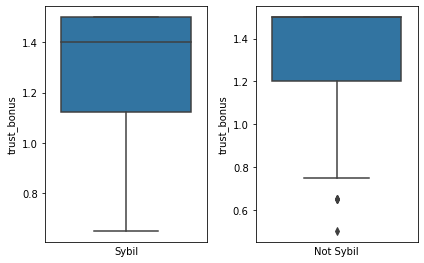

In [374]:
#d = true[["is_twitter_verified", "trust_bonus"]]
#f = false[["is_twitter_verified", "trust_bonus"]]
#j = pd.DataFrame()

plt.subplot(1,2,1)
sns.boxplot(x="is_twitter_verified", y = "trust_bonus", data=d);
plt.xlabel("Sybil")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)

plt.subplot(1,2,2)
sns.boxplot(x="is_twitter_verified", y = "trust_bonus", data=f);
plt.xlabel("Not Sybil")
plt.tight_layout()

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()


In [690]:
df1 = pd.DataFrame()
df1["Methods"] = x_columns
df1["Sybil"] = sybil_TH.true_counts
df1["Not Sybil"] = not_sybil_TH.true_counts

df1.drop(8, inplace=True)

df1.reset_index(drop=True, inplace=True)


percentage_s = []
for i in range(len(df.Sybil)):
    percentage_s.append(np.round(df1.loc[i, "Sybil"]/sum(df.Sybil) * 100, 2))

In [691]:
df1.reset_index(drop=True, inplace=True)

In [519]:
percentage_s = []
for i in range(len(df.Sybil)):
    percentage_s.append(np.round(df1.loc[i, "Sybil"]/sum(df.Sybil) * 100, 2))

In [694]:
percentage_s = []
for i in range(len(df1.Sybil)):
    percentage_s.append(np.round(df1.loc[i, "Sybil"]/sum(df1.Sybil) * 100, 2))

percentage_ns = []
for i in range(len(df1.Sybil)):
    percentage_ns.append(np.round(df1.loc[i, "Not Sybil"]/sum(df1["Not Sybil"]) * 100, 2))
    
    
df1["SYBIL"] = percentage_s
df1["NOT SYBIL"] = percentage_ns

In [698]:


barchart1 = px.bar(data_frame= df1,
                 x= df1.Methods,
                 y=[df1["NOT SYBIL"], df1.SYBIL],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="Number of verified accounts by each trust bonus method with high TB score.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 

barchart1.update_layout(yaxis = dict(tickmode = 'array',tickvals = [0, 10, 20, 30, 40, 50], ticktext = ['0%', '10%', '20%', '30%', '40%', '50%']))
barchart1.show()

In [399]:


barchart = px.bar(data_frame= df,
                 x= x_columns,
                 y=[df.Sybil,df["Not Sybil"]],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of verified accounts by each trust bonus method with high TB score.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart.show()

In [400]:
df.to_csv("verified_accounts_by_each_trust_bonus_method_with_high_TB_score.csv", index=False)

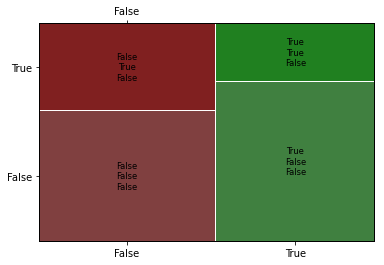

In [411]:
mosaic(sybil, index=["Is Sybil? (T or F)", "is_brightid_verified", "is_duniter_verified", ]);

In [396]:
sybil.columns

Index(['handle', 'Is Sybil? (T or F)', 'Confidence (low, so-so, high)',
       'public_repos', 'public_gists', 'followers', 'following',
       'information_count', 'account_age', 'time_since_updated', 'trust_bonus',
       'is_brightid_verified', 'is_duniter_verified', 'is_twitter_verified',
       'is_poap_verified', 'is_ens_verified', 'is_google_verified',
       'is_facebook_verified', 'is_poh_verified', 'is_idena_connected',
       'is_idena_verified'],
      dtype='object')

In [523]:
df = pd.DataFrame()
df["Methods"] = x_columns
df["Sybil"] = sybil_TH.false_counts
df["Not Sybil"] = not_sybil_TH.false_counts

In [525]:
df.drop(8, inplace=True)

In [526]:
df.reset_index(drop=True, inplace=True)

In [527]:
percentage_s = []
for i in range(len(df.Sybil)):
    percentage_s.append(np.round(df.loc[i, "Sybil"]/sum(df.Sybil) * 100, 2))

percentage_ns = []
for i in range(len(df.Sybil)):
    percentage_ns.append(np.round(df.loc[i, "Sybil"]/sum(df["Not Sybil"]) * 100, 2))
    
    
df["SYBIL"] = percentage_s
df["NOT SYBIL"] = percentage_ns

In [529]:

barchart2 = px.bar(data_frame= df,
                 x= df.Methods,
                 y=[df["NOT SYBIL"], df.SYBIL],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="Number of unverified accounts by each trust bonus method with high TB score.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 

barchart2.update_layout(yaxis = dict(tickmode = 'array',tickvals = [0, 5, 10, 15, 20, 25, 30, 35], ticktext = ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%']))

barchart2.show()

In [319]:
df = pd.DataFrame()
df["Methods"] = x_columns
df["Sybil"] = sybil_TH.false_counts
df["Not Sybil"] = not_sybil_TH.false_counts

barchart = px.bar(data_frame= df,
                 x= x_columns,
                 y=[df.Sybil,df["Not Sybil"]],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of unverified accounts by each trust bonus method with high TB score.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart.show()

In [530]:
df = pd.DataFrame()
df["Methods"] = x_columns
df["Sybil"] = sybil_TL.false_counts
df["Not Sybil"] = not_sybil_TL.false_counts

In [531]:
df.drop(8, inplace=True)
df.reset_index(drop=True, inplace=True)

In [532]:
percentage_s = []
for i in range(len(df.Sybil)):
    percentage_s.append(np.round(df.loc[i, "Sybil"]/sum(df.Sybil) * 100, 2))

percentage_ns = []
for i in range(len(df.Sybil)):
    percentage_ns.append(np.round(df.loc[i, "Sybil"]/sum(df["Not Sybil"]) * 100, 2))
    
    
df["SYBIL"] = percentage_s
df["NOT SYBIL"] = percentage_ns

In [533]:
barchart3 = px.bar(data_frame= df,
                 x= df.Methods,
                 y=[df["NOT SYBIL"], df.SYBIL],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="Number of unverified accounts by each trust bonus method with low TB score.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart3.update_layout(yaxis = dict(tickmode = 'array',tickvals = [0, 5, 10, 15, 20, 25, 30, 35], ticktext = ['0%', '5%', '10%', '15%', '20%', '25%', '30%', '35%']))

barchart3.show()

In [323]:
df = pd.DataFrame()
df["Methods"] = x_columns
df["Sybil"] = sybil_TL.false_counts
df["Not Sybil"] = not_sybil_TL.false_counts

barchart = px.bar(data_frame= df,
                 x= x_columns,
                 y=[df.Sybil,df["Not Sybil"]],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of unverified accounts by each trust bonus method with low TB score.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart.show()

In [534]:
df = pd.DataFrame()
df["Methods"] = x_columns
df["Sybil"] = sybil_TL.true_counts
df["Not Sybil"] = not_sybil_TL.true_counts

In [535]:
df

,Methods,Sybil,Not Sybil
0,BrightID,6,3
1,Duniter,0,0
2,Twitter,8,19
3,POAP,16,11
4,ENS,7,15
5,Google,55,50
6,Facebook,17,16
7,PoH,0,0
8,Idena_connected,22,9
9,Idena_verified,0,0


In [536]:
df.drop(8, inplace=True)
df.reset_index(drop=True, inplace=True)

In [537]:
percentage_s = []
for i in range(len(df.Sybil)):
    percentage_s.append(np.round(df.loc[i, "Sybil"]/sum(df.Sybil) * 100, 2))

percentage_ns = []
for i in range(len(df.Sybil)):
    percentage_ns.append(np.round(df.loc[i, "Sybil"]/sum(df["Not Sybil"]) * 100, 2))
    
    
df["SYBIL"] = percentage_s
df["NOT SYBIL"] = percentage_ns

In [538]:
barchart4 = px.bar(data_frame= df,
                 x= df.Methods,
                 y=[df["NOT SYBIL"], df.SYBIL,],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  #barmode="group",
                  title="Number of verified accounts by each trust bonus method with low TB score.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 

barchart4.update_layout(yaxis = dict(tickmode = 'array',tickvals = [0, 20, 40, 60, 80, 100], ticktext = ['0%', '20%', '40%', '60%', '80%', '100%']))

barchart4.show()

In [324]:
df = pd.DataFrame()
df["Methods"] = x_columns
df["Sybil"] = sybil_TL.true_counts
df["Not Sybil"] = not_sybil_TL.true_counts

barchart = px.bar(data_frame= df,
                 x= x_columns,
                 y=[df.Sybil,df["Not Sybil"]],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of verified accounts by each trust bonus method with low TB score.",
                  labels={"variable": "Class",
                          "Class": ["Sybil", "Not Sybil"],
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart.show()

In [200]:
barchart = px.bar(data_frame= sybil_TH,
                 x= x_columns,
                 y=[sybil_TH.true_counts,sybil_TH.false_counts],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of verified and unverified accounts by each trust bonus method with high TB score(SYBIL).",
                  labels={"variable": "Class",
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart.show()

#### low trust bonus score 

In [177]:
false_counts =  []

column_names = []

for column in columns:
    
        false_counts.append(tl[column].value_counts()[0])
    
        column_names.append(column)

In [180]:
true_counts =  []

column_name = []

for column in columns:
    
    if column not in ["is_duniter_verified", "is_idena_verified","is_poh_verified"]:
    
        true_counts.append(tl[column].value_counts()[1])

        column_name.append(column)

In [185]:
true_counts.insert(1, 0)
column_name.insert(1, "is_duniter_verified")
true_counts.insert(9, 0)
column_name.insert(1, "is_idena_verified")
true_counts.insert(7, 0)
column_name.insert(7, "is_poh_verified")



sybil_Fl = pd.DataFrame()
sybil_Fl["methods"] = column_names
sybil_Fl["false_counts"] = false_counts

sybil_tl = pd.DataFrame()
sybil_tl["methods"] = column_name
sybil_tl["true_counts"] = true_counts

sybil_TL = sybil_tl.merge(sybil_Fl, on="methods")

In [188]:
barchart = px.bar(data_frame= sybil_TL,
                 x= "true_counts",
                 y=x_columns,
                 color="true_counts",
                 opacity=0.9,
                 orientation="h",
                  text="true_counts",
                  title="Number of verified accounts by each trust bonus method with low trust bonus score(Sybil)",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"true_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 
barchart.show()

In [190]:
barchart = px.bar(data_frame= sybil_TL,
                 x= "false_counts",
                 y=x_columns,
                 color="false_counts",
                 opacity=0.9,
                 orientation="h",
                  text="false_counts",
                  title="Number of unverified accounts by each trust bonus method with low trust bonus score(Sybil).",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"false_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 )

barchart.show()

In [191]:
barchart = px.bar(data_frame= sybil_TL,
                 x= x_columns,
                 y=[sybil_TL.true_counts,sybil_TL.false_counts],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of verified and unverified accounts by each trust bonus method with low TB score(SYBIL).",
                  labels={"variable": "Class",
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart.show()

## TRUST BONUS SCORE FOR NOT_SYBIL DATASET

#### High trust bonus score

In [202]:
fh = false.loc[false["trust_bonus"] >= 1]
fl = false.loc[false["trust_bonus"] < 1 ]

In [203]:
false_counts =  []

column_names = []

for column in columns:
    
        false_counts.append(fh[column].value_counts()[0])
    
        column_names.append(column)

In [205]:
true_counts =  []

column_name = []

for column in columns:
    
    if column not in ["is_duniter_verified", "is_idena_verified"]:
    
        true_counts.append(fh[column].value_counts()[1])

        column_name.append(column)

In [207]:
true_counts.insert(1, 0)
column_name.insert(1, "is_duniter_verified")
true_counts.insert(9, 0)
column_name.insert(9, "is_idena_verified")

not_sybil_Fh = pd.DataFrame()
not_sybil_Fh["methods"] = column_names
not_sybil_Fh["false_counts"] = false_counts

not_sybil_th = pd.DataFrame()
not_sybil_th["methods"] = column_name
not_sybil_th["true_counts"] = true_counts

not_sybil_TH = not_sybil_th.merge(not_sybil_Fh, on="methods")

In [209]:
barchart = px.bar(data_frame= not_sybil_TH,
                 x= "true_counts",
                 y=x_columns,
                 color="true_counts",
                 opacity=0.9,
                 orientation="h",
                  text="true_counts",
                  title="Number of verified accounts by each trust bonus method with high trust bonus score(NOT SYBIL)",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"true_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 
barchart.show()

In [210]:
barchart = px.bar(data_frame= not_sybil_TH,
                 x= "false_counts",
                 y=x_columns,
                 color="false_counts",
                 opacity=0.9,
                 orientation="h",
                  text="false_counts",
                  title="Number of unverified accounts by each trust bonus method with high trust bonus score(NOT SYBIL).",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"false_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 )

barchart.show()

In [211]:
barchart = px.bar(data_frame= not_sybil_TH,
                 x= x_columns,
                 y=[not_sybil_TH.true_counts,not_sybil_TH.false_counts],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of verified and unverified accounts by each trust bonus method with high TB score(NOT SYBIL).",
                  labels={"variable": "Class",
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart.show()

#### Low trust bonus score

In [212]:
false_counts =  []

column_names = []

for column in columns:
    
        false_counts.append(fl[column].value_counts()[0])
    
        column_names.append(column)

In [214]:
true_counts =  []

column_name = []

for column in columns:
    
    if column not in ["is_duniter_verified", "is_idena_verified","is_poh_verified"]:
    
        true_counts.append(fl[column].value_counts()[1])

        column_name.append(column)

In [215]:
true_counts.insert(1, 0)
column_name.insert(1, "is_duniter_verified")
true_counts.insert(9, 0)
column_name.insert(1, "is_idena_verified")
true_counts.insert(7, 0)
column_name.insert(7, "is_poh_verified")



not_sybil_Fl = pd.DataFrame()
not_sybil_Fl["methods"] = column_names
not_sybil_Fl["false_counts"] = false_counts

not_sybil_tl = pd.DataFrame()
not_sybil_tl["methods"] = column_name
not_sybil_tl["true_counts"] = true_counts

not_sybil_TL = not_sybil_tl.merge(not_sybil_Fl, on="methods")

In [216]:
barchart = px.bar(data_frame= not_sybil_TL,
                 x= "true_counts",
                 y=x_columns,
                 color="true_counts",
                 opacity=0.9,
                 orientation="h",
                  text="true_counts",
                  title="Number of verified accounts by each trust bonus method with low trust bonus score(NOT Sybil)",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"true_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 ) 
barchart.show()

In [217]:
barchart = px.bar(data_frame= not_sybil_TL,
                 x= "false_counts",
                 y=x_columns,
                 color="false_counts",
                 opacity=0.9,
                 orientation="h",
                  text="false_counts",
                  title="Number of unverified accounts by each trust bonus method with low trust bonus score(NOT SYBIL).",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  labels={"false_counts": "Counts",
                         "y": "Methods"}
                 #color_discrete_sequence=["darkorange", "lightblue"]
                 )

barchart.show()

In [257]:
barchart = px.scatter(data_frame= not_sybil_TL,
                 x= x_columns,
                 y=[not_sybil_TL.true_counts,not_sybil_TL.false_counts],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  title="Number of verified and unverified accounts by each trust bonus method with low TB score(NOT SYBIL).",
                  labels={"variable": "Class",
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart.show()

In [218]:
barchart = px.bar(data_frame= not_sybil_TL,
                 x= x_columns,
                 y=[not_sybil_TL.true_counts,not_sybil_TL.false_counts],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of verified and unverified accounts by each trust bonus method with low TB score(NOT SYBIL).",
                  labels={"variable": "Class",
                         "x": "Methods", 
                         "true_counts": "True",
                         "false_counts": "False"}
                 ) 
barchart.show()

#### Distribution of Trust bonus score across SYBIL and NOT_SYBIL datasets.

In [224]:
false.groupby("trust_bonus").size().values

array([ 78,  22,  13,  10,  12,  13,  12,  14,   4,  18,   8,   6,  22,
         5,  10,  19, 132], dtype=int64)

In [230]:
true.groupby("trust_bonus").size().values

array([147,  20,  11,  21,  10,   5,   7,  17,   2,  17,  13,   1,   8,
         1,   9,   5,  65], dtype=int64)

In [228]:
false.groupby("trust_bonus").size().index

Float64Index([ 0.5, 0.65, 0.75,  0.8,  0.9, 0.95,  1.0, 1.05,  1.1, 1.15,  1.2,
              1.25,  1.3, 1.35,  1.4, 1.45,  1.5],
             dtype='float64', name='trust_bonus')

In [233]:
tb = pd.DataFrame()
tb["Trust Bonus Scores"] = false.groupby("trust_bonus").size().index
tb["Sybil"] = true.groupby("trust_bonus").size().values
tb["Not Sybil"] = false.groupby("trust_bonus").size().values

In [234]:
tb

,Trust Bonus Scores,Sybil,Not Sybil
0,0.50,147,78
1,0.65,20,22
2,0.75,11,13
3,0.80,21,10
4,0.90,10,12
5,0.95,5,13
6,1.00,7,12
7,1.05,17,14
8,1.10,2,4
9,1.15,17,18


In [299]:
sybil.columns

Index(['handle', 'Is Sybil? (T or F)', 'Confidence (low, so-so, high)',
       'public_repos', 'public_gists', 'followers', 'following',
       'information_count', 'account_age', 'time_since_updated', 'trust_bonus',
       'is_brightid_verified', 'is_duniter_verified', 'is_twitter_verified',
       'is_poap_verified', 'is_ens_verified', 'is_google_verified',
       'is_facebook_verified', 'is_poh_verified', 'is_idena_connected',
       'is_idena_verified'],
      dtype='object')

In [298]:
line = px.scatter(data_frame=true,
              x="handle",
              y="trust_bonus")
line.update_layout(xaxis = dict(tickmode = 'array',tickvals = tb["Trust Bonus Scores"],ticktext = tb["Trust Bonus Scores"]))

line

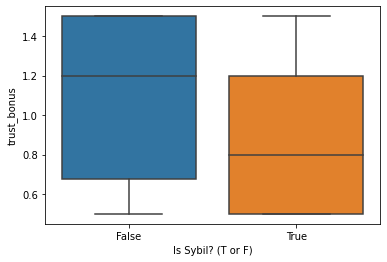

In [313]:
#plt.figure(figsize=(20, 10))
sns.boxplot(data=sybil, y="trust_bonus", x= "Is Sybil? (T or F)")

plt.show()

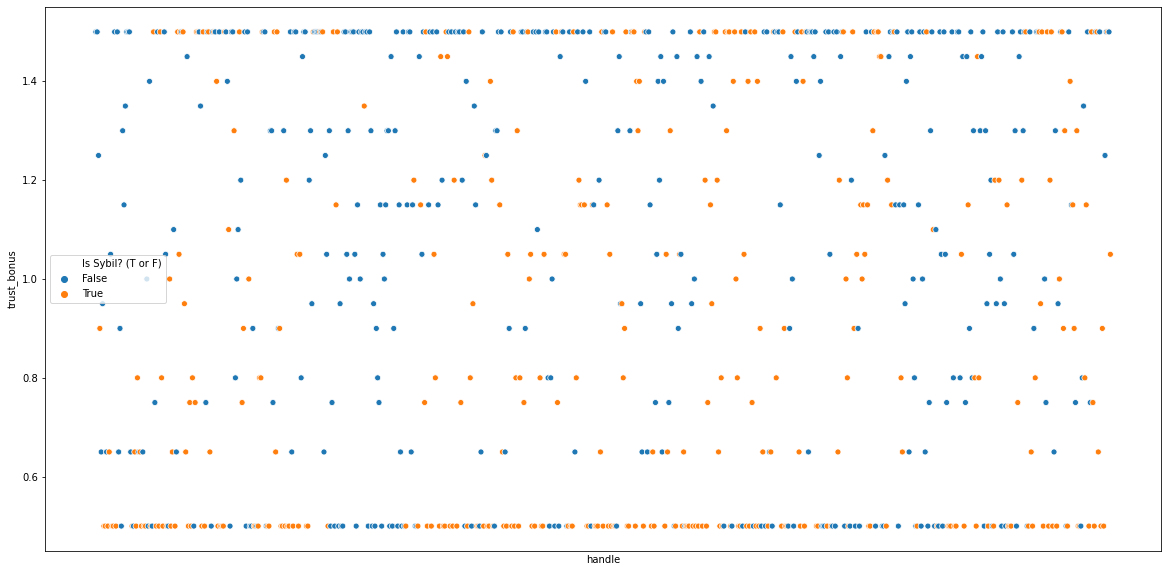

In [305]:
plt.figure(figsize=(20, 10))
sns.scatterplot(data=sybil, x="handle", y= "trust_bonus", hue="Is Sybil? (T or F)")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.show()

In [242]:
barchart = px.bar(data_frame= tb,
                 x= "Trust Bonus Scores",
                 y=["Sybil", "Not Sybil"],
                 #color="counts",
                 opacity=0.9,
                 orientation="v",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  barmode="group",
                  title="Number of verified and unverified accounts by each trust bonus method with low TB score(NOT SYBIL).") 
barchart.update_layout(xaxis = dict(tickmode = 'array',tickvals = tb["Trust Bonus Scores"],ticktext = tb["Trust Bonus Scores"]))

barchart.show()

In [252]:
scatter = px.scatter(data_frame= tb,
                 x= "Trust Bonus Scores",
                 y=["Sybil", "Not Sybil"],
                 #color="counts",
                 opacity=0.7,
                size="Trust Bonus Scores",
                  color_continuous_scale=px.colors.diverging.Spectral,
                  title="Plot showing distribution of various trust bonus scores across sybil and not sybil accounts.") 
scatter.update_layout(xaxis = dict(tickmode = 'array',tickvals = tb["Trust Bonus Scores"],ticktext = tb["Trust Bonus Scores"]))

scatter.show()

In [258]:
sybil.head()

,handle,Is Sybil? (T or F),"Confidence (low, so-so, high)",public_repos,public_gists,followers,following,information_count,account_age,time_since_updated,...,is_brightid_verified,is_duniter_verified,is_twitter_verified,is_poap_verified,is_ens_verified,is_google_verified,is_facebook_verified,is_poh_verified,is_idena_connected,is_idena_verified
0,bhaumik,False,High,23.0,7.0,17.0,7.0,2,3182 days 05:57:45.504891,82 days 22:28:16.505436,...,False,False,True,True,True,True,True,False,False,False
1,amiic,False,so-so,0.0,0.0,0.0,0.0,0,248 days 03:50:45.504891,248 days 03:50:45.505436,...,True,False,False,True,True,True,False,False,False,False
2,jupiterr-chen,False,so-so,9.0,0.0,0.0,1.0,0,3312 days 19:55:48.504891,36 days 10:00:54.505436,...,True,False,False,False,True,False,False,False,False,False
3,gaojianclare,True,High,0.0,0.0,0.0,0.0,0,152 days 09:16:52.504891,152 days 09:16:52.505436,...,False,False,False,False,True,True,False,False,False,False
4,doublelou,False,Low,14.0,0.0,0.0,0.0,2,2467 days 16:46:49.504891,44 days 19:08:31.505436,...,False,False,False,False,False,True,False,False,True,False


In [259]:
combo = pd.read_csv("./verified_accounts.csv")

In [262]:
dff = pd.DataFrame()
dff["handle"] = sybil.handle


In [263]:

for i in columns:
    dff[i] = np.where(sybil[i] == True, 1, 0)

In [264]:
dff.head()

,handle,is_brightid_verified,is_duniter_verified,is_twitter_verified,is_poap_verified,is_ens_verified,is_google_verified,is_facebook_verified,is_poh_verified,is_idena_connected,is_idena_verified
0,bhaumik,0,0,1,1,1,1,1,0,0,0
1,amiic,1,0,0,1,1,1,0,0,0,0
2,jupiterr-chen,1,0,0,0,1,0,0,0,0,0
3,gaojianclare,0,0,0,0,1,1,0,0,0,0
4,doublelou,0,0,0,0,0,1,0,0,1,0


In [271]:
start_list = dff.iloc[0, 1:].values
string = "".join([str(item) for item in start_list])
string

'0011111000'

In [272]:
combination = []
for i in range(sybil.shape[0]):
    start_list = dff.iloc[i, 1:].values
    combination.append("".join([str(item) for item in start_list]))

In [275]:
pd.Series(combination).value_counts()[:20]

0000000000    214
0000010000     34
1001110000     30
0001110000     18
1001011000     13
0001100000     13
0001011000     13
0000011000     13
0001000000     12
0000110000     12
0001010000     11
0010011000     11
1011111010     11
1001110010     11
1001100000     11
1000110000     11
1011110000     10
1000111000     10
0001111000     10
1001111010     10
dtype: int64

In [277]:
dff.columns[1:]

Index(['is_brightid_verified', 'is_duniter_verified', 'is_twitter_verified',
       'is_poap_verified', 'is_ens_verified', 'is_google_verified',
       'is_facebook_verified', 'is_poh_verified', 'is_idena_connected',
       'is_idena_verified'],
      dtype='object')

In [279]:
dff["trust_bonus"] = sybil["trust_bonus"]
dff["Is Sybil? (T or F)"] = sybil["Is Sybil? (T or F)"]
dff["combinations"] = combination

In [280]:
true = dff[dff["Is Sybil? (T or F)"] == True]

In [282]:
false = dff[dff["Is Sybil? (T or F)"] == False]

In [284]:
false.combinations.value_counts()[:10]

0000000000    78
1001110000    17
0000010000    15
0001110000    13
1001110010     9
0001100000     9
1011111010     9
0011111000     8
1001100000     8
0010011000     8
Name: combinations, dtype: int64

In [286]:
false.groupby("combinations").mean()["trust_bonus"]

combinations
0000000000    0.509615
0000000010    0.500000
0000010000    0.670000
0000010010    0.650000
0000011000    0.821429
                ...   
1011110000    1.500000
1011110010    1.500000
1011110100    1.500000
1011111000    1.500000
1011111010    1.500000
Name: trust_bonus, Length: 86, dtype: float64

In [287]:
import networkx as nx

In [308]:
G = nx.from_pandas_edgelist(dff, "trust_bonus", "handle")
G = nx.from_pandas_nodelist(dff, "is_brightid_verified")


AttributeError: module 'networkx' has no attribute 'from_pandas_nodelist'

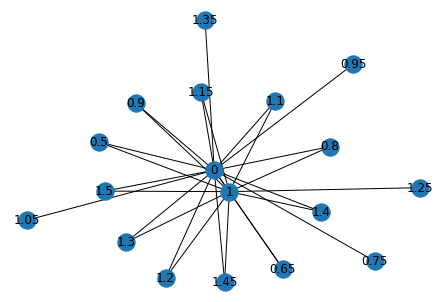

In [291]:
nx.draw(G, with_labels=True)
plt.show()

In [293]:
dff.loc[dff["trust_bonus"] == 1.25]["is_brightid_verified"].value_counts()

1    7
Name: is_brightid_verified, dtype: int64

## Mosaic

In [386]:
from statsmodels.graphics.mosaicplot import mosaic

In [387]:
sybil.columns

Index(['handle', 'Is Sybil? (T or F)', 'Confidence (low, so-so, high)',
       'public_repos', 'public_gists', 'followers', 'following',
       'information_count', 'account_age', 'time_since_updated', 'trust_bonus',
       'is_brightid_verified', 'is_duniter_verified', 'is_twitter_verified',
       'is_poap_verified', 'is_ens_verified', 'is_google_verified',
       'is_facebook_verified', 'is_poh_verified', 'is_idena_connected',
       'is_idena_verified'],
      dtype='object')

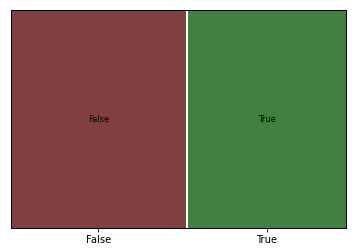

In [389]:
mosaic(sybil, ["Is Sybil? (T or F)"]);